# Student performance 
### Student scores in various categories given in the dataset are analyzed. It begins with initial analysis of data for cleaning and drawing valuable conclusions per catergory. In the later part, visualization of data using python charts is shown along with some simple and some complex plots.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#importing libraries
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
#Renamed columns
df.rename(columns = {"race/ethnicity": 'race', 'parental level of education' : 'education', 'test preparation course': 'coursetaken'}, inplace = True)

In [4]:
# finding null values
df.isnull().sum()

gender           0
race             0
education        0
lunch            0
coursetaken      0
math score       0
reading score    0
writing score    0
dtype: int64

In [5]:
#isolating particular row values for better understanding.
df3 = df.groupby('race')
df3.get_group('group A').head()

,gender,race,education,lunch,coursetaken,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
13,male,group A,some college,standard,completed,78,72,70
14,female,group A,master's degree,standard,none,50,53,58
25,male,group A,master's degree,free/reduced,none,73,74,72
46,female,group A,associate's degree,standard,completed,55,65,62


In [6]:
#Looking for conclusions for highest scores for males and females.
df2 = df.groupby('gender').mean()
df2

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<AxesSubplot:xlabel='gender', ylabel='count'>

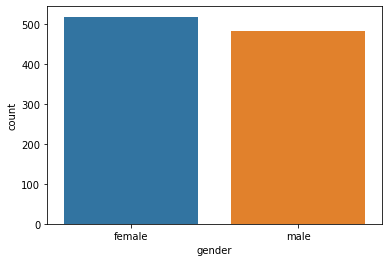

In [7]:
#showcasing gender ratio

sns.countplot(x='gender', data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

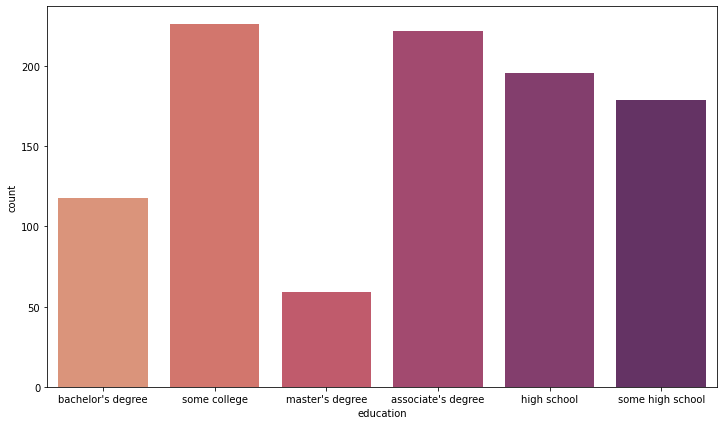

In [8]:
# checking for level of Education.
plt.figure(figsize=(12, 7))
sns.countplot(x='education', data=df, palette='flare')

<AxesSubplot:xlabel='race', ylabel='count'>

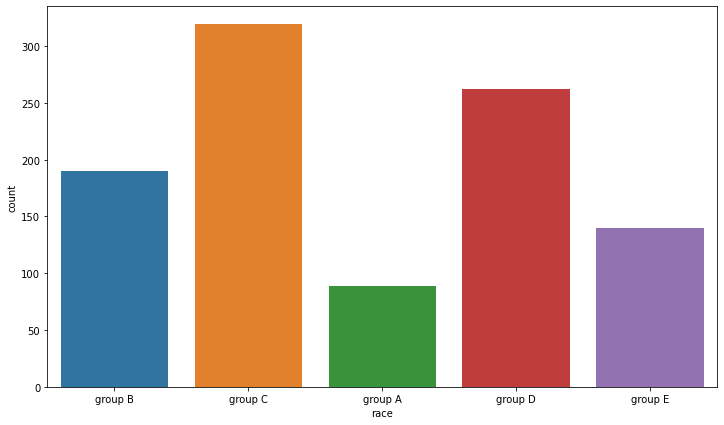

In [9]:
#analyzing ethinicity/race
plt.figure(figsize=(12, 7))
sns.countplot(x='race', data=df)

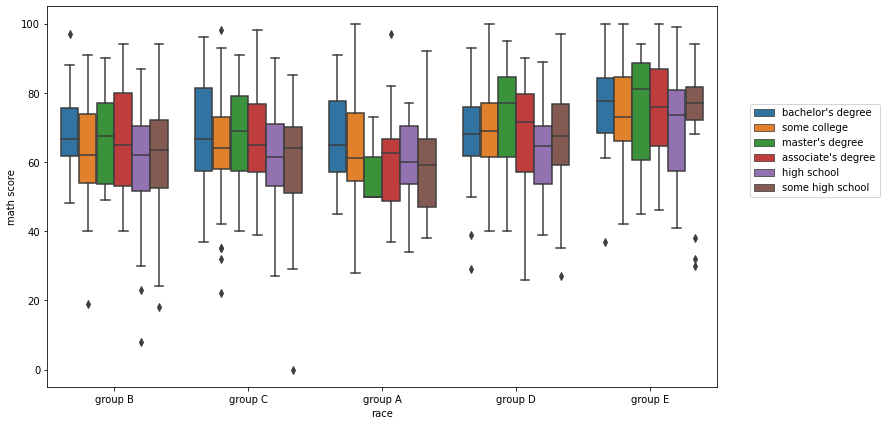

In [10]:
#visualizing math score with race and level of education with boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x='race', y='math score', data=df, hue='education');

plt.legend(loc=(1.05, 0.5))

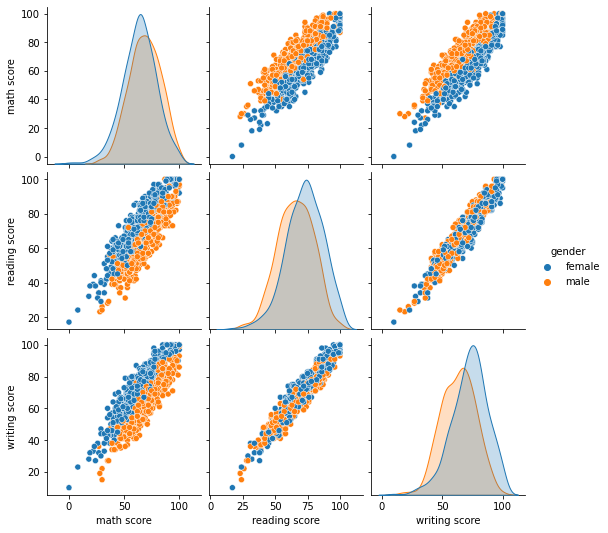

In [11]:
sns.pairplot(df, hue='gender');

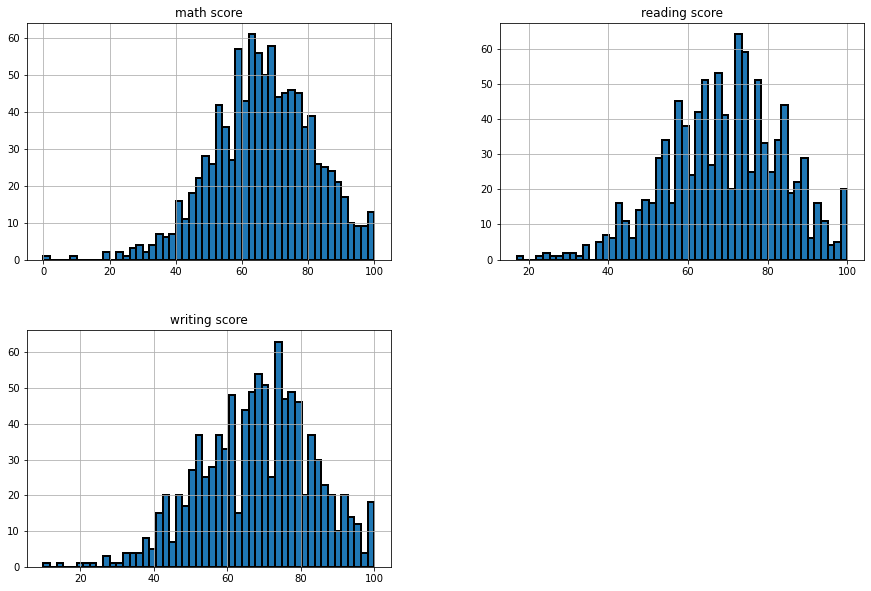

In [12]:
#Using histograms for understanding scores.
df.hist(figsize=(15,10),edgecolor='black',linewidth=2,bins=50)
plt.show()

C:\Users\Sam\anaconda3\ANNACONDA3.7\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sam\anaconda3\ANNACONDA3.7\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sam\anaconda3\ANNACONDA3.7\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'writing score')

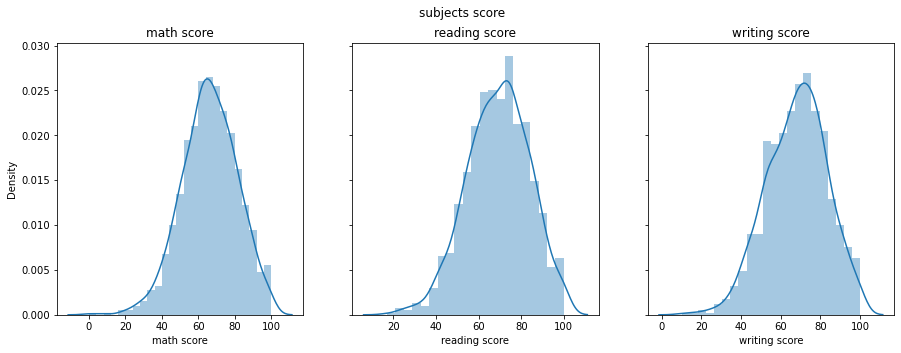

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('subjects score')

# math score
sns.distplot(df['math score'] , kde=True,ax=axes[0])
axes[0].set_title(df['math score'].name)

# reading score
sns.distplot(df['reading score'] , kde=True,ax=axes[1])
axes[1].set_title(df['reading score'].name)

# wrinting score
sns.distplot(df['writing score'] , kde=True,ax=axes[2])
axes[2].set_title(df['writing score'].name)


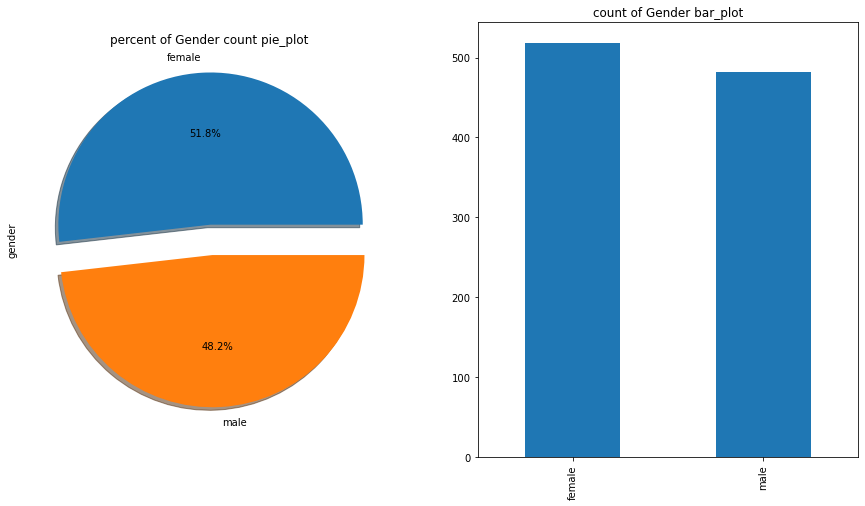

In [14]:
#Visualizing gender related facts
fig, axarr = plt.subplots(1,2,figsize=(15,8))

df.gender.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of Gender count pie_plot ')

df.gender.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('count of Gender bar_plot')

plt.show()

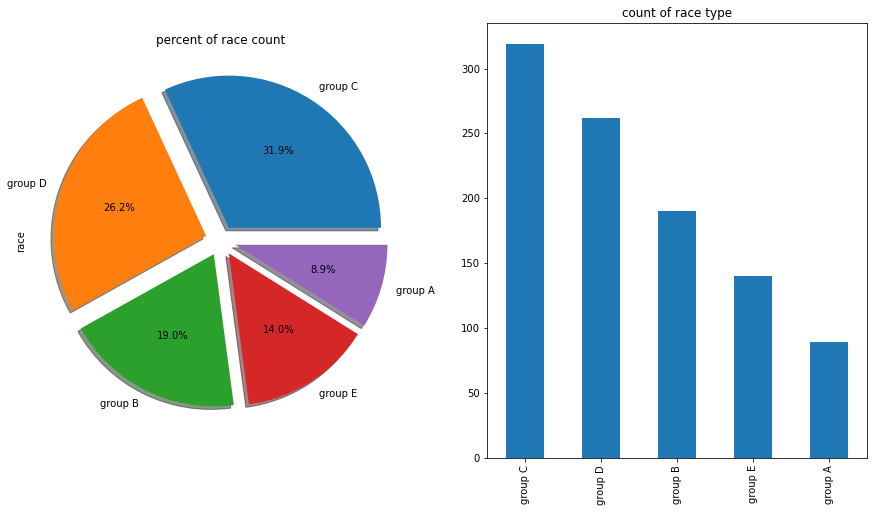

In [15]:
#visualizing race/ethinicity related facts
fig, axarr = plt.subplots(1,2,figsize=(15,8))

df.race.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of race count')

df.race.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('count of race type')

plt.show()

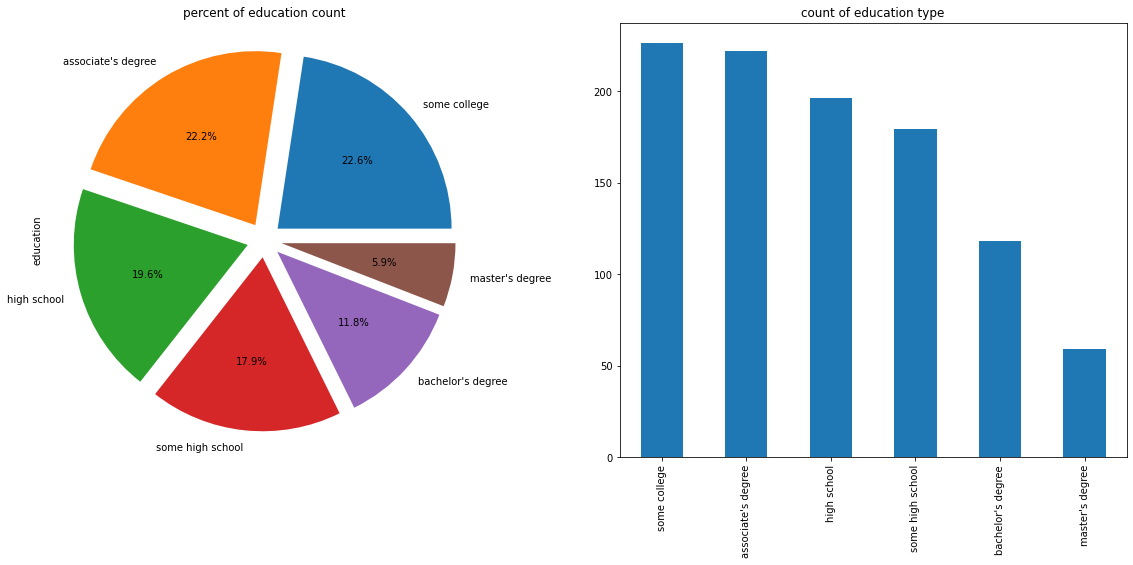

In [16]:
#visualizing Education related facts
fig, axsm = plt.subplots(1,2,figsize=(20,8))

df.education.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1],ax=axsm[0])
axsm[0].set_title('percent of education count')

df.education.value_counts().plot.bar(ax=axsm[1])
axsm[1].set_title('count of education type')

plt.show()

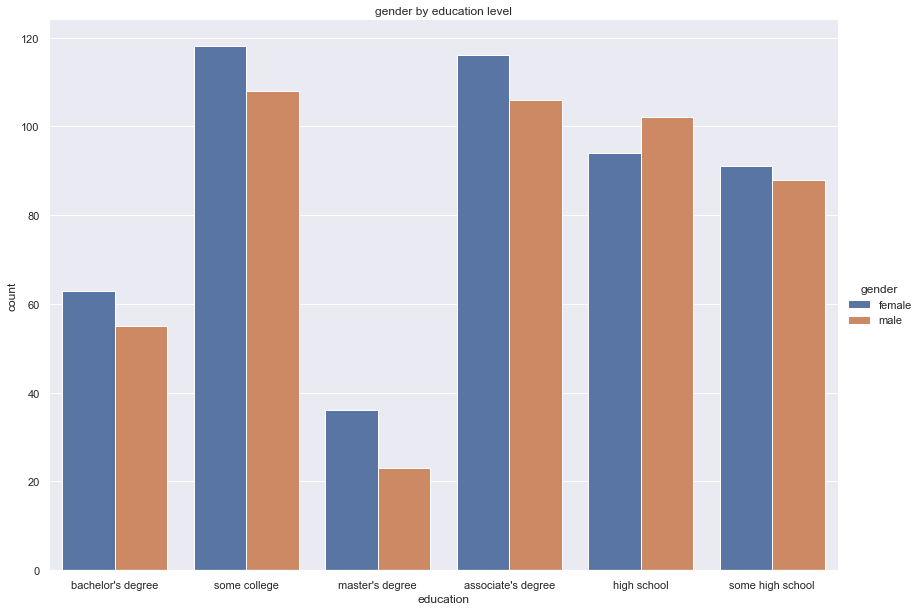

In [17]:
# category plot for gender by education level
sns.set_theme(style="darkgrid")
sns.catplot(x='education',hue='gender',data=df,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('gender by education level')
plt.show()


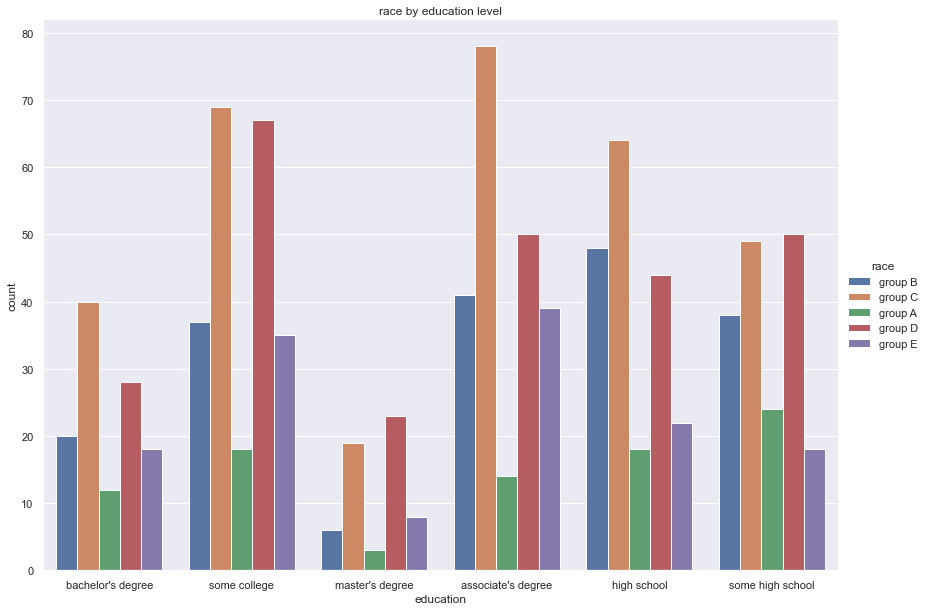

In [18]:
# category plot for race by education level
sns.catplot(x='education',hue='race',data=df,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('race by education level')
plt.show()